# Pymaceuticals Inc.
---

### Analysis

- The sex does not have any correlation in the impact or effectiveness of anti-cancer medication because the distribution is similar 51% (n= 958) male and 49% (n=922) female.
 
- According to the central tendency, the Ramicane’s drug regimen has a slightly better impact on the tumor volume than Capomulin with the close difference of 0.46 points of the average. Also, both are comparable because the total number of mice is the same and distributions of final tumor volume with Ramicane are more robust than Capomulin.
 
-  The effectiveness of Capomulin is the best after 30 days of treatment. The tumor volume drastically decreased, but after 35 days of treatment the graph shows a gradual increase in it.
  
-  According to the results, the correlation coefficient (0.84) indicates a fairly strong positive relationship between mouse weight and average tumor volume. In other words, the higher the weight is,  the more the volume is.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt # import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st # module for statistical analysis in Python -module provides a large number of probability distributions, summary and frequency statistics, correlation functions, statistical tests, and more.
import numpy as np  # point correlation and regression
import seaborn as sns # is a Python data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression # point correlation and regression



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how='left',on =['Mouse ID','Mouse ID'])

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
study_data_complete['Mouse ID'].describe()

count     1893
unique     249
top       g989
freq        13
Name: Mouse ID, dtype: object

In [5]:
study_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [6]:
# Checking the number of mice.
study_data_complete['Mouse ID'].nunique()

249

In [7]:
mice_count =len(study_data_complete['Mouse ID'].unique())
print(f'Number of mice in dataset is {mice_count}.')

Number of mice in dataset is 249.


In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicated_mouse = study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_ID = study_data_complete.loc[duplicated_mouse, 'Mouse ID'].unique()
duplicated_mouse_ID

# or another away in one step is :
# duplicate_mouse_ID= study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
# duplicate_mouse_ID


array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_ID_data = study_data_complete.loc[study_data_complete['Mouse ID'] == duplicated_mouse_ID[0]]
duplicated_mouse_ID_data.round(2)

# or another code may be :
# duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"]=="g989"]
# duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.00,0,Propriva,Female,21,26
137,g989,0,45.00,0,Propriva,Female,21,26
329,g989,5,48.79,0,Propriva,Female,21,26
360,g989,5,47.57,0,Propriva,Female,21,26
620,g989,10,51.75,0,Propriva,Female,21,26
681,g989,10,49.88,0,Propriva,Female,21,26
815,g989,15,51.33,1,Propriva,Female,21,26
869,g989,15,53.44,0,Propriva,Female,21,26
950,g989,20,55.33,1,Propriva,Female,21,26
1111,g989,20,54.66,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete["Mouse ID"].isin(duplicated_mouse_ID)==False]
clean_study_data_complete.head()
# I can use the following code also.
# analysis_data_df = merged_data_df.drop(duplicated_mice_ID_data.index)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

In [12]:
nd_mouse_count = len(clean_study_data_complete["Mouse ID"].unique())
print(f"Number of mice in dataset after I removed duplicate mouse by its ID is {nd_mouse_count}.")

Number of mice in dataset after I removed duplicate mouse by its ID is 248.


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [14]:
# Part A:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

In [15]:
# mean of the tumor volume.
means = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
means

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# median of the tumor volume.
medians = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
medians

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# variance of the tumor volume.
variances = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
variances

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [18]:
#standard deviation of the tumor volume.
stds = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
stds

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# SEM (Standard error of the mean) of the tumor volume.
sems = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
sems

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [20]:
# Part B:
# Assemble the resulting series into a single summary DataFrame.
summary_table = pd.DataFrame({"Mean Tumor Volume":means.map("{:,.2f}".format),
                                "Median Tumor Volume":medians.map("{:,.2f}".format),
                                "Tumor Volume Variance":variances.map("{:,.2f}".format),
                                "Tumor Volume Std. Dev.":stds.map("{:,.2f}".format),
                                "Tumor Volume Std. Err.":sems.map("{:,.2f}".format)})
# display Summary Statistics
summary_table.style.set_properties(**{'text-align': 'center'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')] )])

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [21]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)


# Using the aggregation method, produce the same summary statistics in a single line
summary_table = clean_study_data_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table.style.set_properties(**{'text-align': 'center'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')] )])
summary_table.round(2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

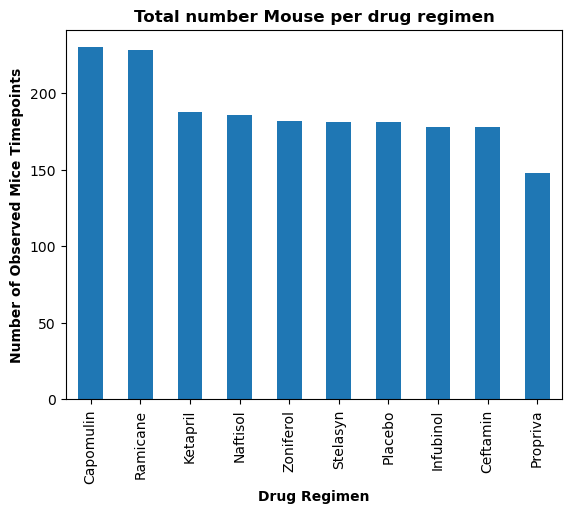

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows = clean_study_data_complete["Drug Regimen"].value_counts().plot.bar(align="center")
#Labels and title
plt.xlabel("Drug Regimen",fontweight = 'bold')
plt.ylabel("Number of Observed Mice Timepoints",fontweight = 'bold')
plt.title("Total number Mouse per drug regimen", fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()
# saving my graph to Imagen folder
# plt.tight_layout()
# pd_bar_mice_per_regimen.figure.savefig('images/pd_bar_mice_per_regimen.png')

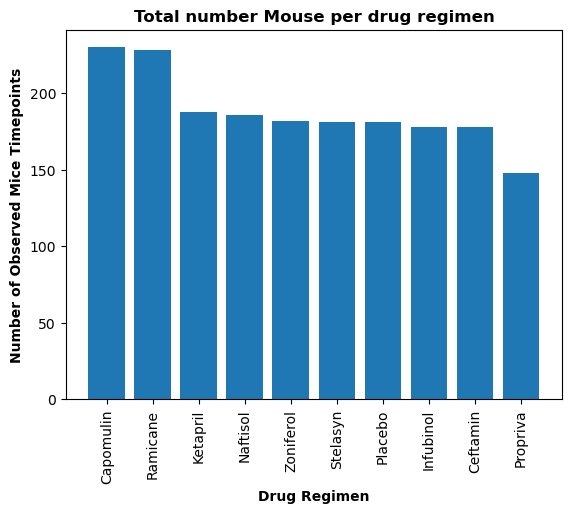

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_rows = clean_study_data_complete["Drug Regimen"].value_counts()
plt.bar(total_rows.index.values, total_rows.values)
#Labels and title
plt.xlabel("Drug Regimen",fontweight = 'bold')
plt.ylabel("Number of Observed Mice Timepoints",fontweight = 'bold')
plt.title("Total number Mouse per drug regimen", fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# I wan to know of distribution by sex in my dataset
Sex = clean_study_data_complete.Sex.value_counts()
Sex

Sex
Male      958
Female    922
Name: count, dtype: int64

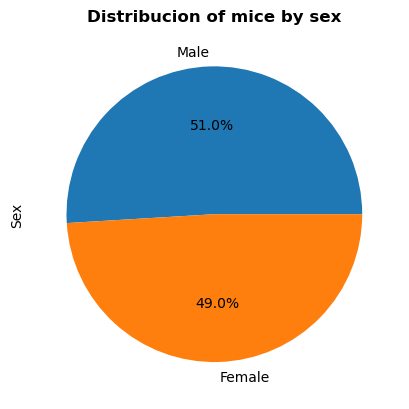

In [25]:
Sex_pie = clean_study_data_complete.Sex.value_counts()
Sex_pie.plot(kind='pie', autopct = '%1.1f%%')
plt.title("Distribucion of mice by sex", fontweight = 'bold')
plt.ylabel('Sex')
plt.show()

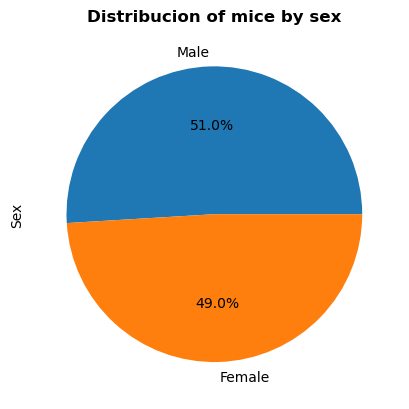

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Sex_pie.values,labels=Sex_pie.index.values, autopct = '%1.1f%%')
plt.title("Distribucion of mice by sex", fontweight = 'bold')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#df = clean_study_data_complete 
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_study_data_complete .groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_study_data_complete , on=['Mouse ID', 'Timepoint'])
final_tumor_volume.round(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.97,2,Infubinol,Female,20,23
1,a251,45,65.53,1,Infubinol,Female,21,25
2,a262,45,70.72,4,Placebo,Female,17,29
3,a275,45,63.00,3,Ceftamin,Female,20,28
4,a366,30,63.44,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.71,0,Propriva,Female,12,26
244,z578,45,30.64,0,Ramicane,Male,11,16
245,z581,45,62.75,3,Infubinol,Female,24,25
246,z795,45,65.74,3,Naftisol,Female,13,29


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug'].isin(treatment_regimens)]
# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 # Step 1: Loop through each treatment regimen
for treatment in treatments:
     
    # Step 2: Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Step 3: add subset 
    tumor_volume_data.append(treatment_data)

     #Step 4: Calculate the quartiles and IQR for the current treatment regimen
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    # Locate potential outliers for the current treatment regimen
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    # Print information about potential outliers according to assigment
    print(f"{treatment}'s potential outliers:{outliers}")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


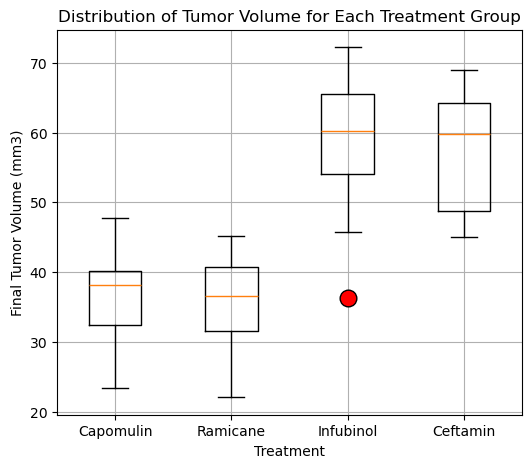

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(6, 5)) # size according to instrution
plt.boxplot(tumor_volume_data, labels=treatments, flierprops={'markerfacecolor':'r','markersize': 12})
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.grid(True) # add a grid to the plot
plt.show()
# flierprops = dict(marker='o', color='orange', markersize=8)
# Save box plot graph to Images folder
# plt.tight_layout()
# final_tumor_plot.figure.savefig('images/final_tumor_boxplot.png')

# Present the box plot chart
# plt.show()

# To close pyplot
# plt.close()

## Line and Scatter Plots

In [30]:
specific_data =  clean_study_data_complete.loc[ clean_study_data_complete['Drug Regimen'] == "Capomulin"]
specific_data.head(30)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
230,x401,0,45.000000,0,Capomulin,Female,16,15
231,l509,0,45.000000,0,Capomulin,Male,17,21
232,s710,0,45.000000,0,Capomulin,Female,1,23
233,r157,0,45.000000,0,Capomulin,Male,22,25
234,u364,0,45.000000,0,Capomulin,Male,18,17


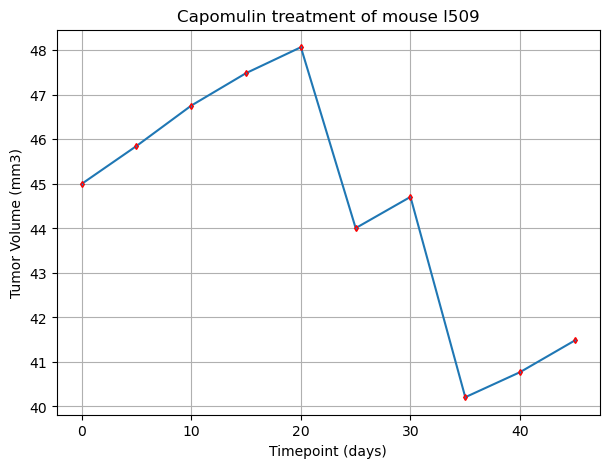

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"
drug_name = "Capomulin"
mouse_data = clean_study_data_complete[(clean_study_data_complete['Mouse ID'] == mouse_id) & (clean_study_data_complete['Drug Regimen'] == drug_name)]
plt.figure(figsize=(7, 5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='d', markersize=3, markeredgecolor='red')
plt.title(f'{drug_name} treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Anwser ChatGPT Step-by-Step Guide
# step 1: I need to filter Data for Capomulin Regimen:
Capomulin_data = clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen'] == 'Capomulin']
#Step 2: I need to calculate the Average Tumor Volume for each Mouse: 
avg_tumor_volume = Capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean','Weight (g)': 'first'  # Assuming weight does not change over time
}).reset_index()
round(avg_tumor_volume,2)

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.96,22
1,b742,40.08,21
2,f966,36.51,17
3,g288,41.99,19
4,g316,44.61,22
5,i557,44.81,24
6,i738,39.14,20
7,j119,44.47,23
8,j246,43.22,21
9,l509,44.43,21


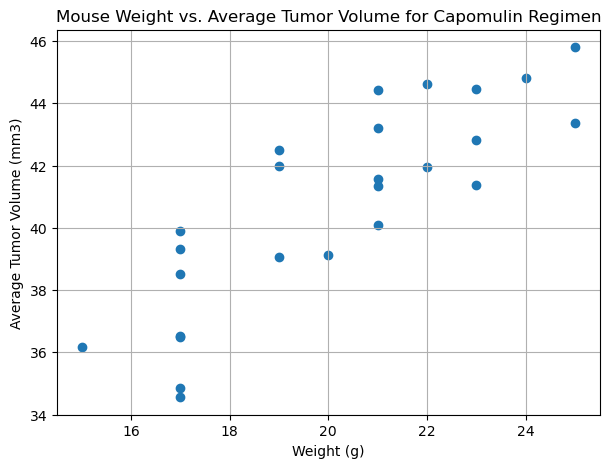

In [33]:
#step 2 Creat graph
plt.figure(figsize=(7,5))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
#labels and tittle
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84
The r-squared is: 0.71
Slope is: 0.95
Intercept is: 21.55


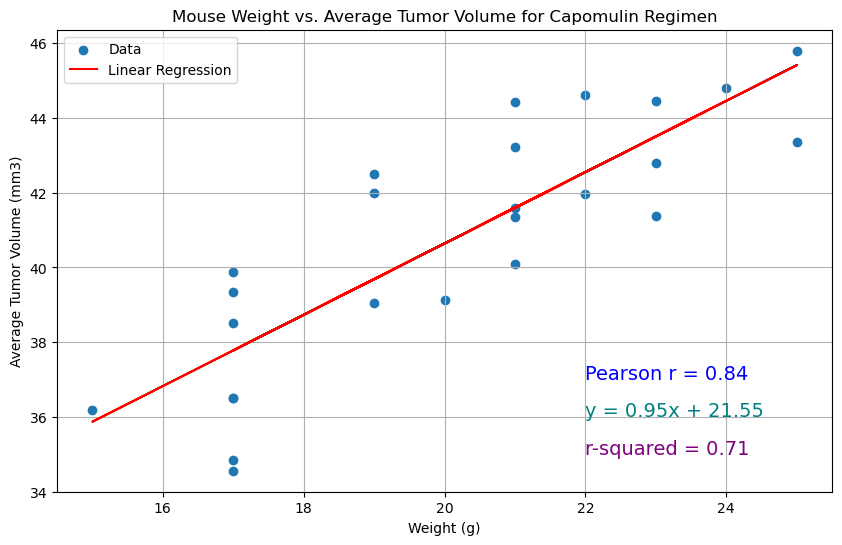

In [34]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# I have My filter data for the Capomulin regimen and I have my average of tumor volumen for treatment
correlation, _ = pearsonr(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
correlation_rounded = round(correlation, 2)
print(f'The correlation between mouse weight and the average tumor volume is  {correlation_rounded}')

# Perform linear regression
X = avg_tumor_volume['Weight (g)'].values.reshape(-1, 1)
y = avg_tumor_volume['Tumor Volume (mm3)'].values
model = LinearRegression()
model.fit(X, y)

# Get the regression line
y_pred = model.predict(X)

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_tumor_volume['Weight (g)'],avg_tumor_volume['Tumor Volume (mm3)'])
# y = mx + b
regress_values = X * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate r-squared
r_squared = round(rvalue**2,2)
print(f"The r-squared is: {r_squared}")

print(f'Slope is: {model.coef_[0]:.2f}')
print(f'Intercept is: {model.intercept_:.2f}')

 # Generate the scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], label='Data')
plt.plot(avg_tumor_volume['Weight (g)'], y_pred, color='red', label='Linear Regression')
# Plot the Annotation in the graph 
plt.annotate(line_eq,(22,36), fontsize=14, color="teal")
plt.annotate(f'Pearson r = {correlation_rounded}', (22,37), fontsize=14, color="blue")
plt.annotate(f'r-squared = {r_squared}', (22,35), fontsize=14, color="purple")
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()